# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

In [132]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### Now take a look at the shapes of the X and y matricies 

In [12]:
print(X.shape, y.shape)

(70000, 784) (70000,)


Image label: 5

Image:


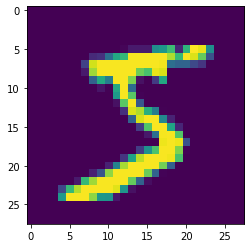

In [42]:
X_rs = X.reshape(X.shape[0], 28, 28)
plt.imshow(X_rs[0])
print(f'Image label: {y[0]}\n\nImage:')

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [52]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

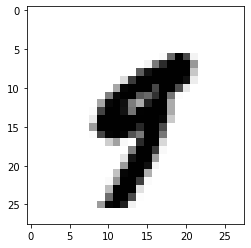

In [51]:
plt.imshow(X[36000].reshape(28,28), cmap='binary', interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [53]:
y[36000] #The image matches with the label

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [58]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [106]:
def is_5(number):
    if number == '5':
        return True
    else:
        return False

In [107]:
y_train_5 = [is_5(i) for i in y_train]
y_test_5 = [is_5(i) for i in y_test]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [108]:
# Let's normalize the data first 

In [109]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [110]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_sc, y_train_5)

/home/victor/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [122]:
y_pred = lr.predict(X_test_sc)

In [123]:
lr.predict(X_train_sc)[36000]

False

In [112]:
y[36000]

'9'

In [ ]:
# It predicts well the 36000th digit

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [113]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [114]:
never_5_clf.fit(X_train_sc, y_train_5)

In [120]:
y_pred_never_5 = never_5_clf.predict(X_test_sc)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [117]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# The probability cutoff is 0.5 as default

In [ ]:
# CONFUSION MATRIX

In [129]:
confusion_matrix(y_test_5, y_pred)

array([[9025,   83],
       [ 141,  751]])

In [131]:
confusion_matrix(y_test_5, y_pred_never_5)

array([[9108,    0],
       [ 892,    0]])

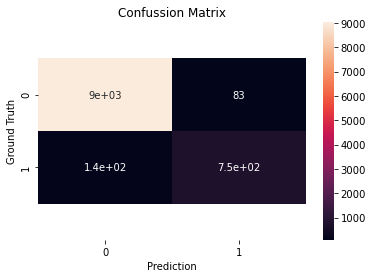

In [135]:
ax = sns.heatmap(confusion_matrix(y_test_5, y_pred), annot=True)

b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

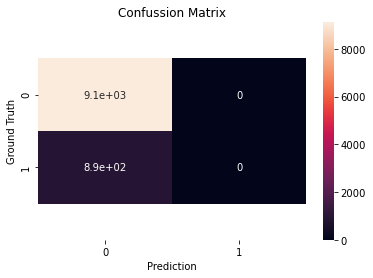

In [136]:
ax = sns.heatmap(confusion_matrix(y_test_5, y_pred_never_5), annot=True)

b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

In [ ]:
# PRECISION SCORE 

In [139]:
precision_lr = precision_score(y_test_5, y_pred)
precision_never_5 = precision_score(y_test_5, y_pred_never_5)

print(f'Precision score LinearRegressor model: {precision_lr}')
print(f'Precision score Never_5 model: {precision_never_5}')

Precision score LinearRegressor model: 0.9004796163069544
Precision score Never_5 model: 0.0


/home/victor/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Precision score in Never_5 is 0 because True Positive is 0, it can't predict any True value

In [ ]:
# RECALL SCORE

In [140]:
recall_lr = recall_score(y_test_5, y_pred)
recall_never_5 = recall_score(y_test_5, y_pred_never_5)

print(f'Recall score LinearRegressor model: {recall_lr}')
print(f'Recall score Never_5 model: {recall_never_5}')

Recall score LinearRegressor model: 0.8419282511210763
Recall score Never_5 model: 0.0


In [ ]:
# Recall score in Never_5 is 0 because True Positive is 0, it can't predict any True value

In [ ]:
# F1 SCORE

In [141]:
f1_lr = f1_score(y_test_5, y_pred)
f1_never_5 = f1_score(y_test_5, y_pred_never_5)

print(f'F1 score LinearRegressor model: {f1_lr}')
print(f'F1 score Never_5 model: {f1_never_5}')

F1 score LinearRegressor model: 0.8702201622247971
F1 score Never_5 model: 0.0


In [ ]:
# F1 score in Never_5 is 0 because True Positive is 0, it can't predict any True value

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# The main difference is Never_5 model has precision, recall and (obviously) f1 score equal to 0 
# because it predicts always not 5 and never guesses the True value

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [165]:
from sklearn.metrics import roc_curve, roc_auc_score

In [150]:
y_pred_proba = lr.predict_proba(X_test_sc)

In [161]:
roc_curve_lr = roc_curve(y_test_5, y_pred_proba[:,1])
roc_curve_never_5 = roc_curve(y_test_5, y_pred_never_5)

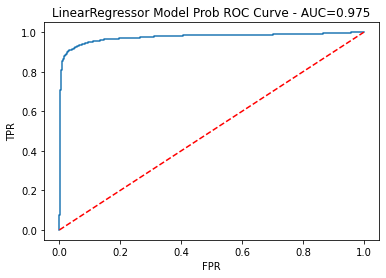

In [169]:
fpr, tpr, thresholds = roc_curve_lr
a = roc_auc_score(y_test_5, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'LinearRegressor Model Prob ROC Curve - AUC={a:.3f}')
plt.show();

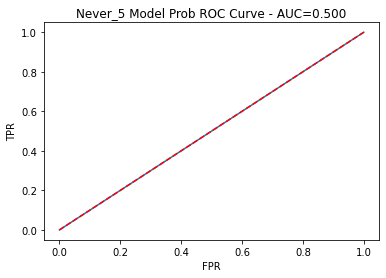

In [170]:
fpr, tpr, thresholds = roc_curve_never_5
a = roc_auc_score(y_test_5, y_pred_never_5)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Never_5 Model Prob ROC Curve - AUC={a:.3f}')
plt.show();

### Now find the roc_auc_score for each. 

In [176]:
roc_auc_score_lr = roc_auc_score(y_test_5, y_pred_proba[:,1])
roc_auc_score_never_5 = roc_auc_score(y_test_5, y_pred_never_5)

print(f'Roc auc score LinearRegressor Model: {roc_auc_score_lr}')
print(f'Roc auc score Never_5 Model: {roc_auc_score_never_5}')

Roc auc score LinearRegressor Model: 0.9751560004411438
Roc auc score Never_5 Model: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# The linear Regressor model works much more better than the Never_5 model.

# I am not sure about the Roc auc score in Never_5 model because we don't have the proba values
# but we can assume the proba of being True is = 0 so it's indeed a worse roc auc value